In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE


In [8]:
# Load data from csv file
filename = "ACME-HappinessSurvey2020.csv"
data = pd.read_csv(filename)

df = pd.read_csv('ACME-HappinessSurvey2020.csv')

# Split the data into input (X) and output (Y)
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
Y = df['Y']

In [9]:
# Display the first 5 rows of the DataFrame
df.head(10)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [ ]:
# Handle imbalance data using SMOTE
sm = SMOTE(random_state=1)
X_res, Y_res = sm.fit_resample(X, Y)

# Split data into training set and test set with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.15, random_state=1, stratify=Y_res)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

# Define the expanded parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')


# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)


In [ ]:

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Accuracy Score:", grid_search.best_score_)


results_df = pd.DataFrame(grid_search.cv_results_)
results_df['mean_test_score'] = results_df['mean_test_score'].astype(float)
pivot_table = results_df.pivot('param_n_estimators', 'param_max_depth', 'mean_test_score')

sns.heatmap(pivot_table, annot=True)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7619047619047619
Accuracy: 0.7619047619047619


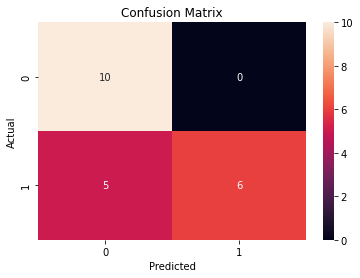

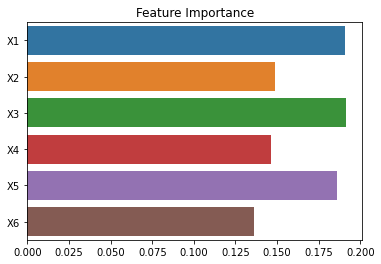

In [12]:
# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Train the RandomForestClassifier with the best parameters
clf_best = RandomForestClassifier(**best_params, random_state=1)
clf_best.fit(X_train, Y_train)

# Predict the target for the test data
Y_pred = clf_best.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Print the accuracy of the model
print("Accuracy:", accuracy_score(Y_test, Y_pred))


# Plot Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Feature Importance
feature_importances = clf_best.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importance')
plt.show()